In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('adults.csv', header=None, sep=',\s', na_values=["?"])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.nunique

<bound method DataFrame.nunique of        age         workclass  fnlwgt   education  education_num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital_status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1   

<Axes: >

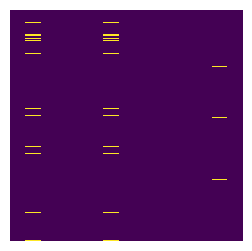

In [7]:
ax = plt.figure(figsize=(3,3))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False, xticklabels=False)
# there are missing values

In [8]:
categorical = [col for col in df.columns if df[col].dtype == 'object']
numerical = [col for col in df.columns if df[col].dtype != 'object']
print(f'the data has {len(categorical)} categical columns')
print('they are:', categorical)
print('\n')
print(f'the data has {len(numerical)} numerical columns')
print('they are:', numerical)
print('\n')

the data has 9 categical columns
they are: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


the data has 6 numerical columns
they are: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']




In [9]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [10]:
print("Unique Values")
for col in categorical:
    print(df[col].value_counts())

Unique Values
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-cle

In [11]:
df['workclass'].value_counts(dropna=False)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
categorical_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
df['workclass'] = pd.DataFrame(categorical_imputer.fit_transform(df['workclass'].values.reshape(-1,1)))

In [13]:
df['workclass'].isnull().sum()

0

In [14]:
for col in categorical:
    df[col] = pd.DataFrame(categorical_imputer.fit_transform(df[col].values.reshape(-1,1)))

<Axes: >

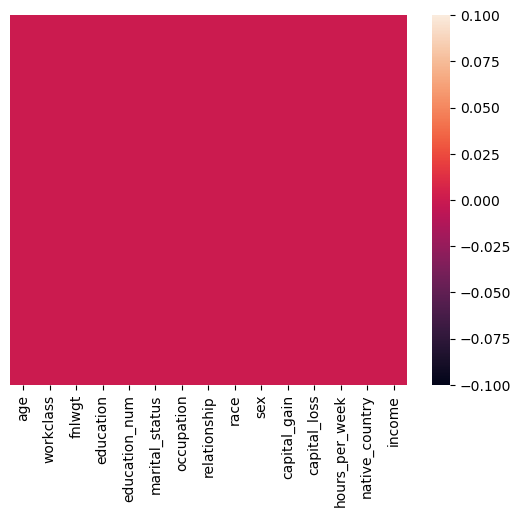

In [15]:
sns.heatmap(df.isnull(), yticklabels=False)

In [16]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Exploratory Data Analysis
## 1. Univariate
### 1.1 Age

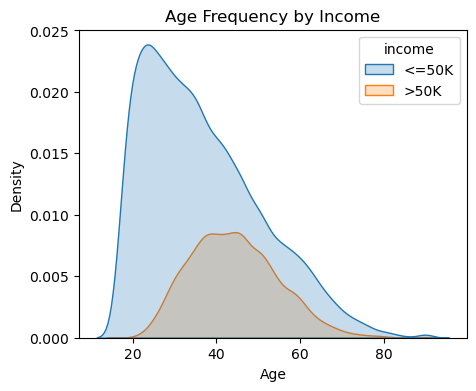

In [17]:
plt.figure(figsize=(5, 4))
sns.kdeplot(data=df, x='age', hue='income',shade=True, color='blue')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Frequency by Income')

# Display the plot
plt.show()

- The frequency of people having an income less than 50k is much more in younger people than of older people
- Much more people are earning less than 50k
- Those who earn more than 50k have a normal distribution of age

### 1.2 Working Class

In [18]:
print(f'There are {df.workclass.nunique()} working classes')
print('----------------------------------')
print(f'Frequency of workers in each working class:', '\n', pd.DataFrame(df.workclass.value_counts()))

There are 8 working classes
----------------------------------
Frequency of workers in each working class: 
                   count
workclass              
Private           24532
Self-emp-not-inc   2541
Local-gov          2093
State-gov          1298
Self-emp-inc       1116
Federal-gov         960
Without-pay          14
Never-worked          7


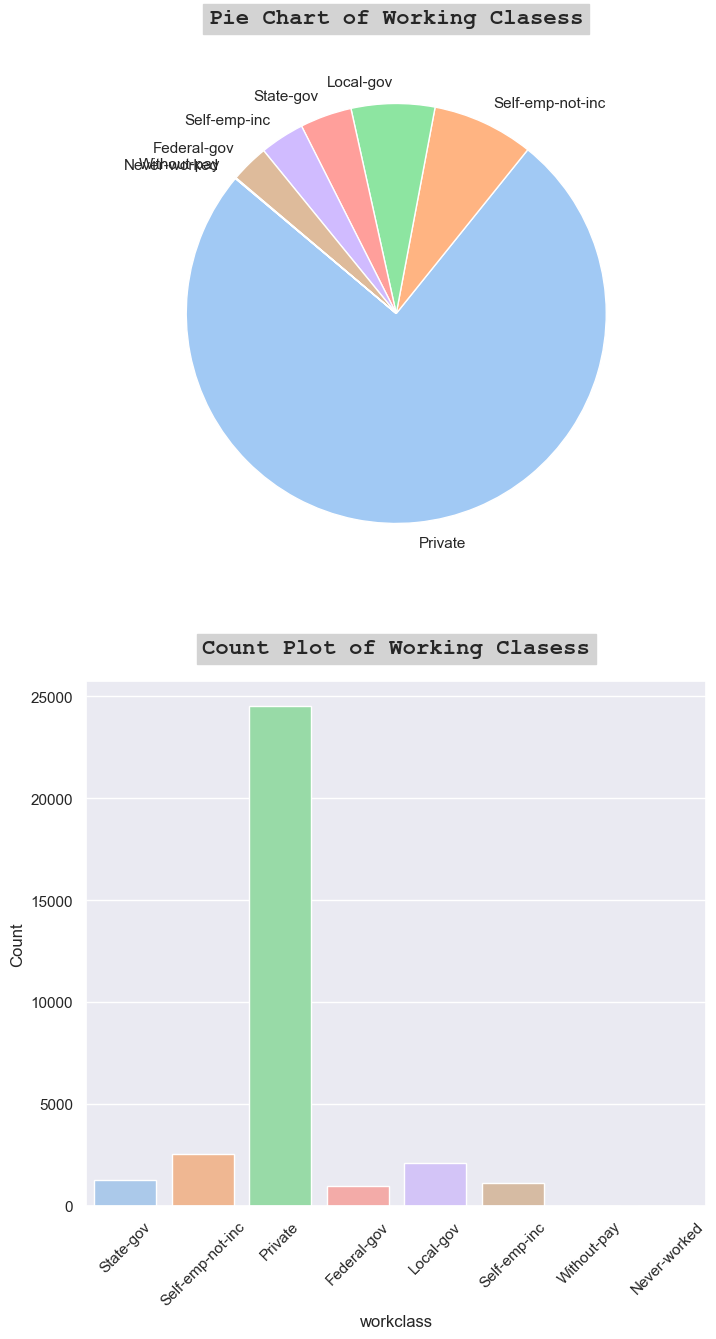

In [51]:
# a pie chart of the working class distribution alongwith a countplot
workers_count = df.workclass.value_counts()
working_classes = workers_count.index
colors = sns.color_palette('pastel')[0:7]

plt.figure(figsize=(8,15))
plt.subplot(2, 1, 1)
plt.pie(workers_count, labels=working_classes, startangle=140, colors=colors)
plt.title('Pie Chart of Working Clasess', fontsize=16, fontweight='bold', fontfamily='courier new', backgroundcolor='lightgrey', pad=20)

plt.subplot(2, 1, 2)
sns.countplot(data=df, x='workclass', palette='pastel')
plt.title('Count Plot of Working Clasess', fontsize=16, fontweight='bold', fontfamily='courier new', backgroundcolor='lightgrey', pad=20)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Most of the workers are employed in the Private sector

### 1.3 Educational Level

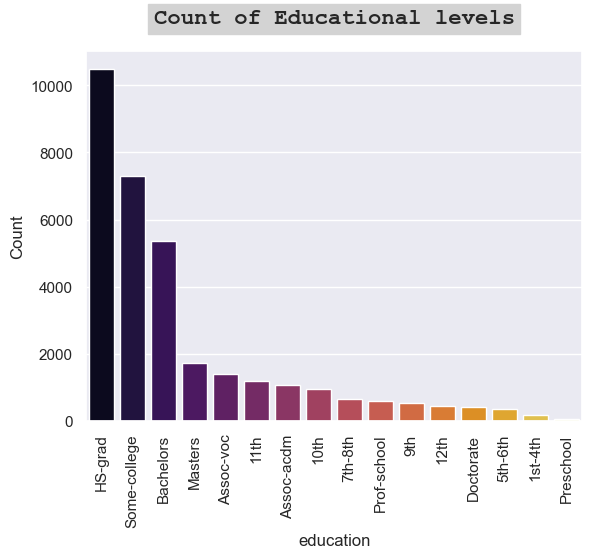

In [52]:
order = df['education'].value_counts().index
sns.set_theme('notebook')
sns.countplot(data=df, x='education', palette='inferno', order=order)
plt.title('Count of Educational levels', fontsize=16, fontweight='bold', fontfamily='courier new', backgroundcolor='lightgrey', pad=20)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [60]:
def plot_count(df, col, title, hue=None):
    order = df[col].value_counts().index
    sns.set_theme('notebook')
    sns.countplot(data=df, x=col, palette='inferno', order=order, hue=hue)
    plt.title(title, fontsize=16, fontweight='bold', fontfamily='courier new', backgroundcolor='lightgrey', pad=20)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

### 1.4 Marital Status

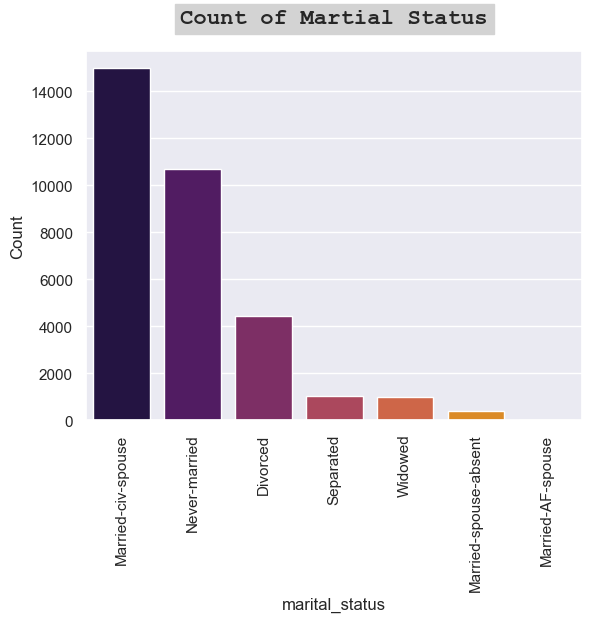

In [61]:
plot_count(df, col='marital_status', title='Count of Martial Status')

### 1.5 Occupation

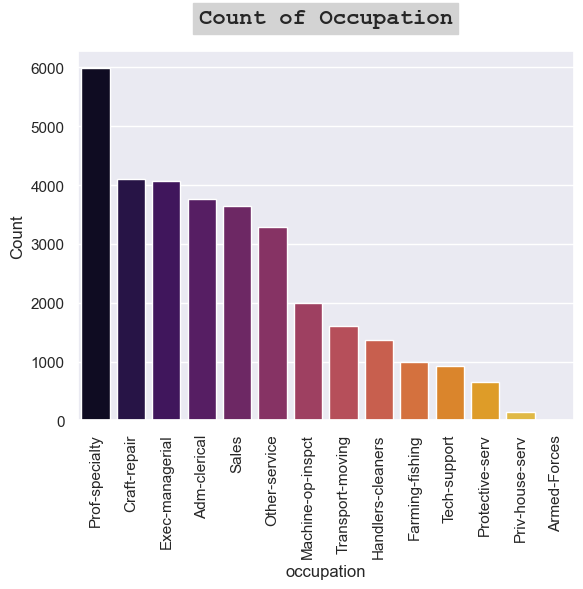

In [62]:
plot_count(df, col='occupation', title='Count of Occupation')

### 1.6 Relationship

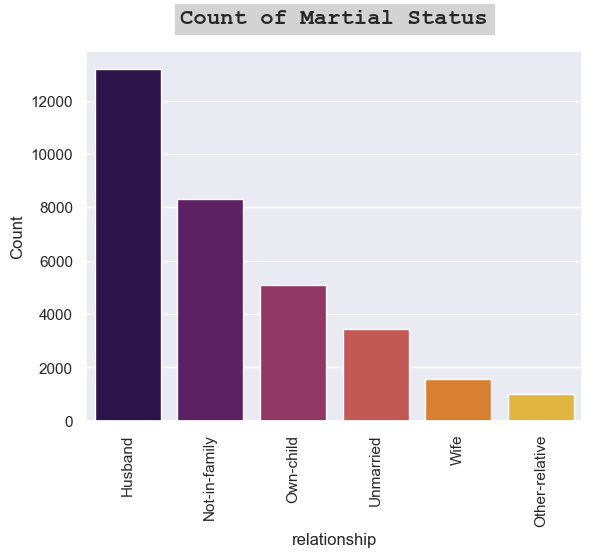

In [63]:
plot_count(df, col='relationship', title='Count of Relationship')

### 1.7 Race

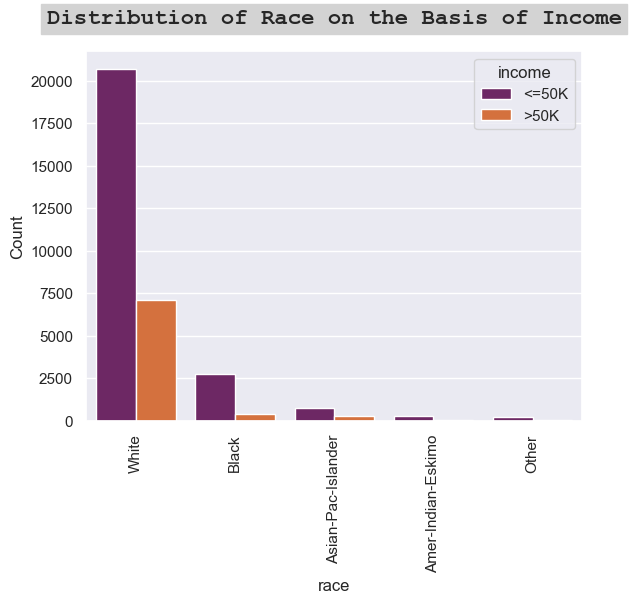

In [66]:
plot_count(df=df, col='race', title='Distribution of Race on the Basis of Income', hue='income')

### 1.8 Gender

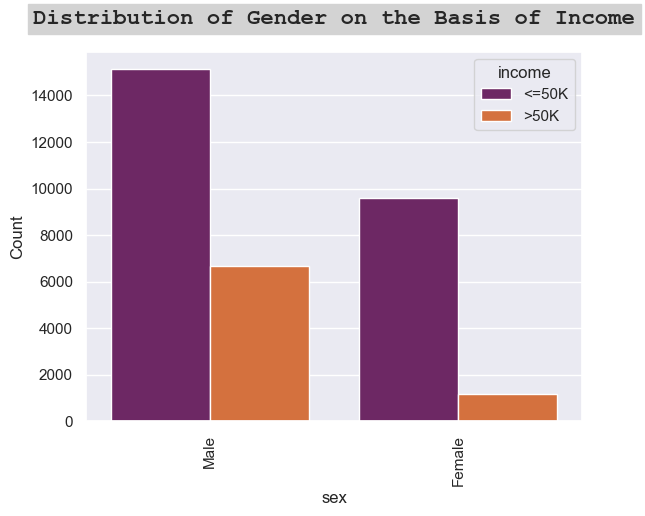

In [67]:
plot_count(df=df, col='sex', title='Distribution of Gender on the Basis of Income', hue='income')

### 1.8 Working Hours

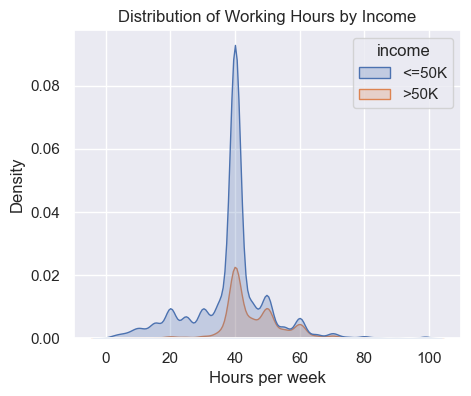

In [70]:
plt.figure(figsize=(5, 4))
sns.kdeplot(data=df, x='hours_per_week', hue='income',shade=True, color='blue')

# Adding labels and title
plt.xlabel('Hours per week')
plt.ylabel('Density')
plt.title('Distribution of Working Hours by Income')

# Display the plot
plt.show()

# Model

In [ ]:
# splitting the features and the target
target = ['income']
features = [col for col in df.columns if col != 'income']

X = df.loc[:, features]
y = df.loc[:, target]

print('number of features', X.shape[1])

number of features 14


In [ ]:
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
categorical.remove('income')

In [ ]:
# one hot encoding categorical features
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=categorical)

X = encoder.fit_transform(X)

In [ ]:
X.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,39,1,0,0,0,0,0,0,0,77516,...,0,0,0,0,0,0,0,0,0,0
1,50,0,1,0,0,0,0,0,0,83311,...,0,0,0,0,0,0,0,0,0,0
2,38,0,0,1,0,0,0,0,0,215646,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,1,0,0,0,0,0,234721,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,1,0,0,0,0,0,338409,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)
X

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.10,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.845803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.65,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.797197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.342456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.662165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.201151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,1.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.221818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.194038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
# evaluation of the model
from sklearn.metrics import accuracy_score

print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")

Model Accuracy: 0.8007630746324214


In [ ]:
y_pred_train = gnb.predict(X_train)

In [ ]:
print(f"Training set Accuracy: {accuracy_score(y_train, y_pred_train)}")

Training set Accuracy: 0.8007334402933761


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

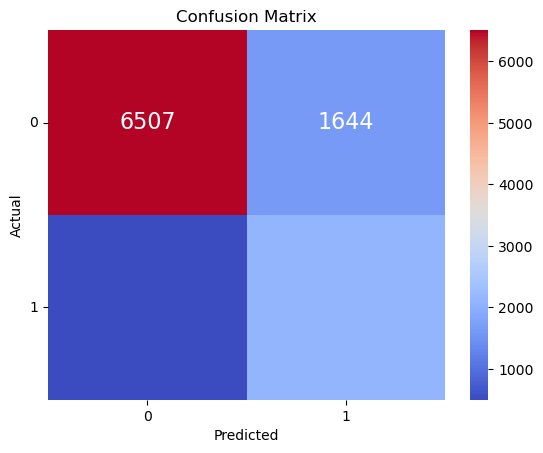

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', annot_kws={"size": 16})
plt.yticks(rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      8151
        >50K       0.56      0.81      0.66      2595

    accuracy                           0.80     10746
   macro avg       0.74      0.80      0.76     10746
weighted avg       0.84      0.80      0.81     10746



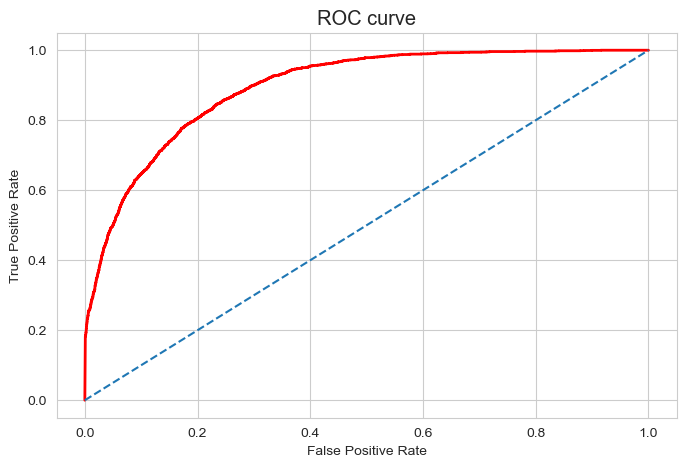

In [ ]:
# auc roc curve
y_pred1 = gnb.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr,'r', linewidth=2, dash_capstyle='round')
plt.plot([0,1], [0,1], '--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# roc auc
from sklearn.metrics import roc_auc_score
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred1)}")

ROC-AUC Score: 0.8935153410967224
